# Predict the Criminal with Bagging

Bagging is an abbreviation for "bootstrap aggregating". It'a meta-algorithm, which takes M subsamples (with replacement) from the initial dataset and trains the predictive model on those subsamples. The final model is obtained by averaging the "bootstrapped" models and usually yields better results.

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline

## Get the Data

In [3]:
train = pd.read_csv('criminal_train.csv')
test = pd.read_csv('criminal_test.csv')

In [4]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [5]:
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


## Exploratory Data Analysis

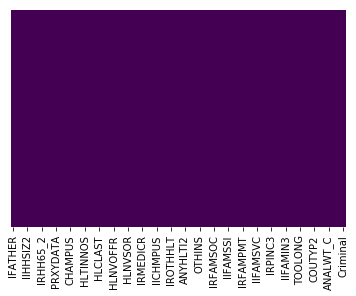

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Train data do not have any Null values

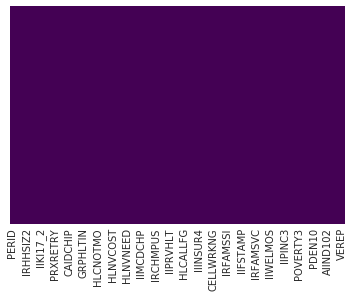

In [30]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Test data do not have any Null values

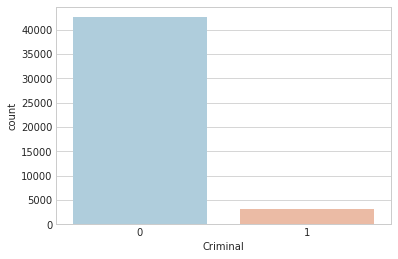

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',data=train,palette='RdBu_r')

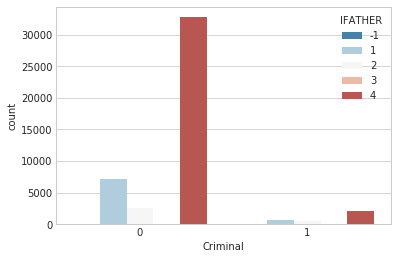

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',hue='IFATHER',data=train,palette='RdBu_r')

### Count Unique features

In [31]:
feats_counts = train.nunique(dropna=False)

In [32]:
feats_counts.sort_values()[:10]

Criminal    2
IIFAMSSI    3
IRFAMSSI    3
IIFAMSOC    3
IRFAMSOC    3
OTHINS      3
IRMCDCHP    3
IIMCDCHP    3
IRMEDICR    3
IIMEDICR    3
dtype: int64

# Data Cleaning
## For Duplicate Columns

In [8]:
train_enc = pd.DataFrame(index= train.index)

In [9]:
for col in tqdm_notebook(train.columns):
    train_enc[col] = train[col].factorize()[0]

In [10]:
dup_col = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i+1 :]:
        if c2 not in dup_col and np.all(train_enc[c1] == train_enc[c2]):
            dup_col[c2]=c1

In [11]:
dup_col

{'HLCALL99': 'HLCALLFG'}

In [12]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


##  Drop Duplicte Columns

In [ ]:
train.drop('PERID', axis=1,inplace=True)

In [16]:
train.drop("HLCALL99",axis=1,inplace=True)
test.drop("HLCALL99",axis=1, inplace=True)

In [17]:
train.shape

(45718, 70)

In [18]:
test.shape

(11430, 70)

In [19]:
nunique = train.nunique()

# Building a Model
## Train-Test Split
Split the data into Training testing set

In [33]:
train1 = train.drop('Criminal', axis=1)
y = train['Criminal']
test1 = test.drop('PERID', axis=1)

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

## Bagged Predictions

## Random Forest
### Training and Predicting
We'll start training using Random Forest.

In [35]:
model = RandomForestClassifier()

In [36]:
bags = 10
seed = 1

In [37]:
bagged_predictions = np.zeros(test.shape[0])

In [38]:
for n in range (0, bags):
    model.set_params(random_state = seed+n)
    model.fit(train1,y)
    preds = model.predict(test1)
    bagged_predictions+=preds

In [39]:
bagged_predictions.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
for i in range (0, 11430):
    if (bagged_predictions[i] > 5):
        bagged_predictions[i] = 1
        
    else:
        bagged_predictions[i] = 0
    

In [41]:
print(bagged_predictions)

[ 0.  0.  0. ...,  0.  0.  0.]


In [42]:
model.score(train1, y)

0.99634717179229193

## Result file into .csv

In [36]:
submission = pd.DataFrame({    
    "PERID": test["PERID"],
    "Criminal": bagged_predictions,
    })
submission.to_csv('Result3.csv', index=False, columns=['PERID', 'Criminal'])

In [37]:
bagged_predictions

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])